## Fish Weight Prediction using Polynomial Linear Regression

## Loading the dataset

In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/satishgunjal/datasets/master/Fish.csv"

fish_data = pd.read_csv(url)
fish_data.to_csv('Fish.csv', index =False)
print(fish_data.head())


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


## The dataset description

This dataset contains various measurements of fish belonging to different species. The data can be used for regression tasks, such as predicting the weight of a fish based on its dimensions. Here are the details of the columns present in the dataset:

    Species: The type of fish (e.g., Bream, Roach, Perch, etc.).
    Weight: The weight of the fish in grams.
    Length1: Vertical length in cm.
    Length2: Diagonal length in cm.
    Length3: Cross length in cm.
    Height: The height of the fish in cm.
    Width: The diagonal width of the fish in cm.

In [36]:
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Independent and Target Variable

The final target variable is weight here and we are going to predict the weight of the fish using polynomial linear regression which has the equation (one when independent variable)
$$ y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \cdots + \beta_n X^n $$


## Visualising the relationship between different dependent and independent variables using simple scatter plots

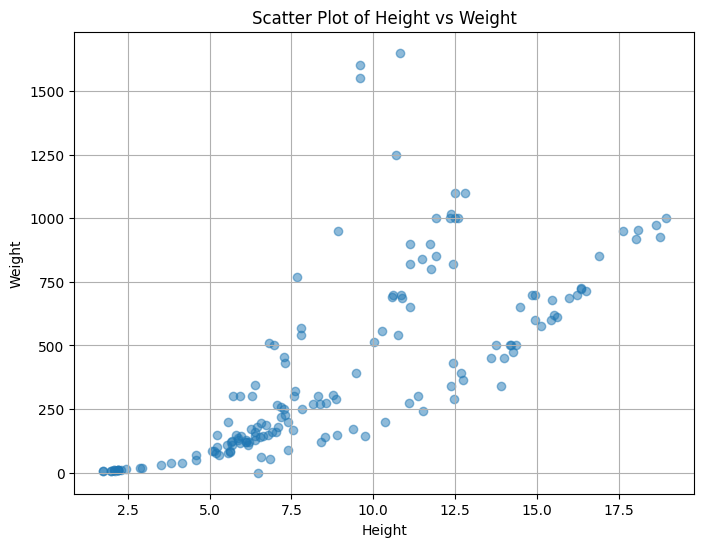

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Fish.csv')

# Define the dependent and independent variables
independent_var = 'Height'  # Replace with your independent variable
dependent_var = 'Weight'  # Replace with your dependent variable

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[independent_var], data[dependent_var], alpha=0.5)
plt.title(f'Scatter Plot of {independent_var} vs {dependent_var}')
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.grid(True)
plt.show()


/home/jupyter/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


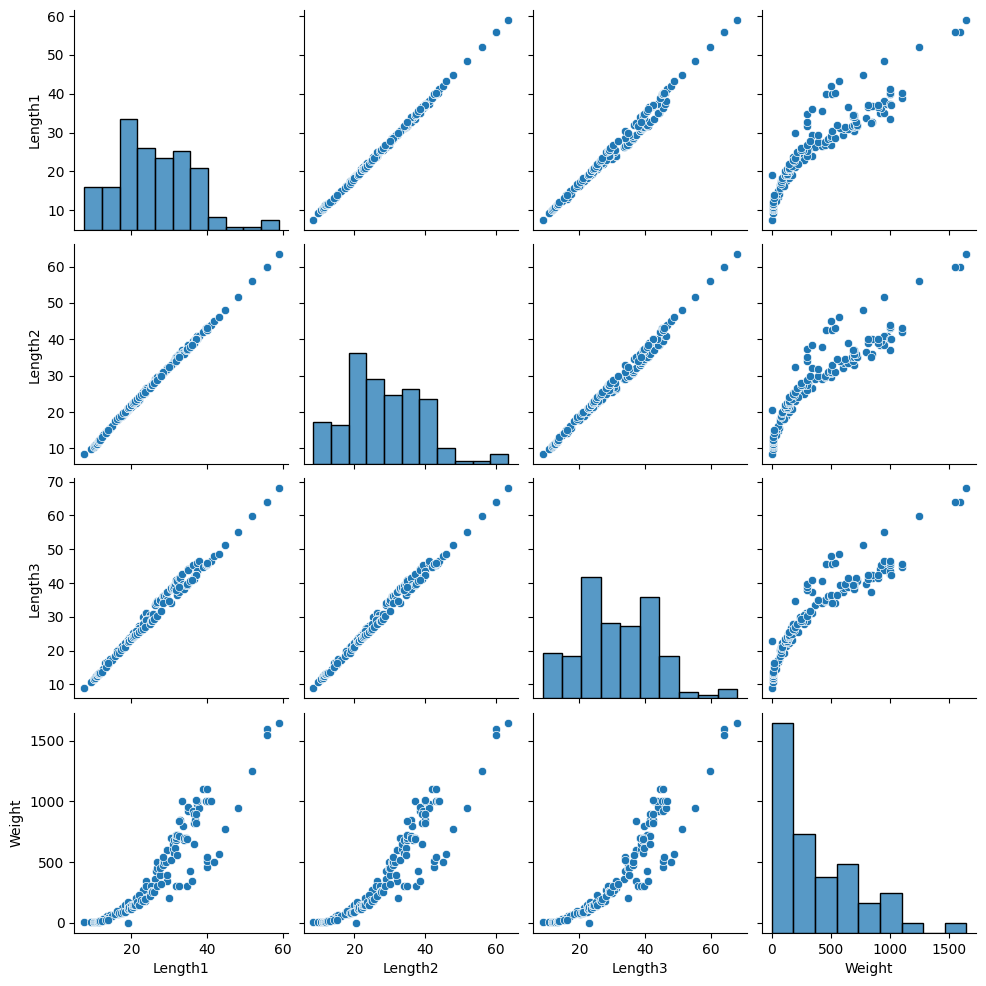

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset

# Define the dependent variable and independent variables
dependent_var = 'Weight'  # Replace with your dependent variable
independent_vars = ['Length1', 'Length2', 'Length3']  # Replace with your independent variables

# Select the relevant columns for the pair plot
selected_columns = independent_vars + [dependent_var]

# Create the pair plot
sns.pairplot(data[selected_columns])

# Show the plot
plt.show()


## Checking Correlations between the independent variables themselves

In [43]:
import pandas as pd

# Load your dataset

# Select only the independent variables
independent_vars = ['Length1', 'Length2', 'Length3', 'Width',]  # Replace with your feature names

# Calculate the correlation matrix
correlation_matrix = data[independent_vars].corr()

# Display the correlation matrix
print(correlation_matrix)


          Length1   Length2   Length3     Width
Length1  1.000000  0.999517  0.992031  0.867050
Length2  0.999517  1.000000  0.994103  0.873547
Length3  0.992031  0.994103  1.000000  0.878520
Width    0.867050  0.873547  0.878520  1.000000


## Checking correlations of the Independent variables against the Dependent variables

In [44]:
import pandas as pd

dependent_var = 'Weight'  # Replace with your dependent variable
independent_vars = ['Length1', 'Length2', 'Length3', 'Width','Height']  # Replace with your independent variables

correlations_with_target = data[independent_vars + [dependent_var]].corr()[dependent_var].drop(dependent_var)

print(correlations_with_target)


Length1    0.915712
Length2    0.918618
Length3    0.923044
Width      0.886507
Height     0.724345
Name: Weight, dtype: float64


## Preprocessing the dataset

Bringing the target variable at the end of the dataset for ease

In [45]:
dataset= fish_data

In [46]:
dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [47]:
cols= dataset.columns.tolist()
cols.append(cols.pop(cols.index('Weight')))
cols

['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']

In [48]:
dataset=dataset[cols]
dataset

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0
...,...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936,12.2
155,Smelt,11.7,12.4,13.5,2.4300,1.2690,13.4
156,Smelt,12.1,13.0,13.8,2.2770,1.2558,12.2
157,Smelt,13.2,14.3,15.2,2.8728,2.0672,19.7


## Dropping the features which can lead to multicollinearity and unstable model

In [49]:
# Drop Length2 and Length3 based on high correlation with Length1
dataset = dataset.drop(columns=['Length2', 'Length3'])


In [50]:
dataset

,Species,Length1,Height,Width,Weight
0,Bream,23.2,11.5200,4.0200,242.0
1,Bream,24.0,12.4800,4.3056,290.0
2,Bream,23.9,12.3778,4.6961,340.0
3,Bream,26.3,12.7300,4.4555,363.0
4,Bream,26.5,12.4440,5.1340,430.0
...,...,...,...,...,...
154,Smelt,11.5,2.0904,1.3936,12.2
155,Smelt,11.7,2.4300,1.2690,13.4
156,Smelt,12.1,2.2770,1.2558,12.2
157,Smelt,13.2,2.8728,2.0672,19.7


## Separating the Independent and Dependent variables

In [51]:
X= dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

In [ ]:
y

## Since species is a categorical variable, we need to encode it

We will be using one hot encoding here since the number of categories is less, might not affect the dimensionality of the dataset as adversely

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

#Column number of species is 0

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


Let's see how it looks post encoding

In [55]:
X

array([[1.0, 0.0, 0.0, ..., 23.2, 11.52, 4.02],
       [1.0, 0.0, 0.0, ..., 24.0, 12.48, 4.3056],
       [1.0, 0.0, 0.0, ..., 23.9, 12.3778, 4.6961],
       ...,
       [0.0, 0.0, 0.0, ..., 12.1, 2.277, 1.2558],
       [0.0, 0.0, 0.0, ..., 13.2, 2.8728, 2.0672],
       [0.0, 0.0, 0.0, ..., 13.8, 2.9322, 1.8792]], dtype=object)

In [93]:
X[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.2, 11.52, 4.02], dtype=object)

The categorical variable has now been encoded and we can proceed with the model training

## Polynomial Linear Regression Model Training

Before training the model we need transform the feature of matrix to fit the model equation below

$$ y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \cdots + \beta_n X^n $$

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)


## Splitting into training and test data

In [86]:
from sklearn.model_selection import train_test_split	
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state = 42)							

Actual Training

In [87]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

## Model Evaluation metrics

Training Set Performance:
MSE: 1643.5129
RMSE: 40.5403
MAE: 26.5383
R²: 0.9866

Test Set Performance:
MSE: 3614.8770
RMSE: 60.1238
MAE: 38.8301
R²: 0.9746


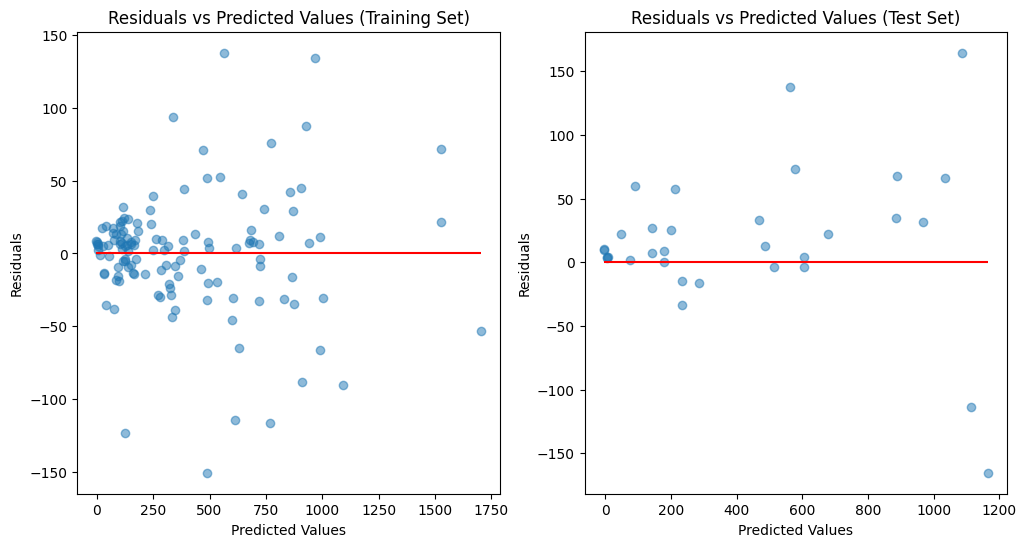

In [89]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)  # RMSE is the square root of MSE
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print(f"Training Set Performance:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R²: {r2_train:.4f}")

print(f"\nTest Set Performance:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R²: {r2_test:.4f}")


residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot residuals for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, alpha=0.5)
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot residuals for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()


P.S.: Due to the small size of dataset this is the maximum R2 score achieved and there is significant amount of MAE RMSE, fine tuning can help more, with techniques like Ridge Regularization if there's still multicollinearity present.

In [90]:
X_test

array([[ 1.        ,  0.        ,  0.        , ..., 27.03168064,
        16.23918128,  9.75562756],
       [ 1.        ,  0.        ,  0.        , ...,  5.9049    ,
         3.08367   ,  1.610361  ],
       [ 1.        ,  0.        ,  0.        , ..., 31.002624  ,
        18.7953408 , 11.39467536],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  4.90135321,
         2.58118601,  1.35932281],
       [ 1.        ,  0.        ,  0.        , ..., 46.580625  ,
        30.432675  , 19.882681  ],
       [ 1.        ,  0.        ,  0.        , ..., 21.049744  ,
        13.495602  ,  8.65242225]])

In [91]:
X_test[0]

array([  1.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        16.8       ,   5.1992    ,   3.1234    ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  16.8       ,
         5.1992    ,   3.1234    ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       282.24      ,  87.34656   ,  52.47312   ,  27.03

## Making a custom prediction

In [108]:
# Define species list in the order they appear in the dataset
species_list = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

def get_user_input():
    species = input("Enter the species (Bream, Roach, Whitefish, Parkki, Perch, Pike, Smelt): ")
    
    if species not in species_list:
        print("Invalid species entered. Please enter a valid species.")
        return None
    
    try:
        length1 = float(input("Enter Length1: "))
        height = float(input("Enter Height: "))
        width = float(input("Enter Width: "))
    except ValueError:
        print("Invalid input for numeric values. Please enter valid numbers.")
        return None
    
    # One-hot encode species
    species_encoded = [1 if species == s else 0 for s in species_list]
    
    feature_vector = species_encoded + [length1, height, width]
    
    return feature_vector

X_user = get_user_input()



Enter the species (Bream, Roach, Whitefish, Parkki, Perch, Pike, Smelt):  Bream
Enter Length1:  23.2
Enter Height:  11.52
Enter Width:  4.02


In [109]:
X_user

[1, 0, 0, 0, 0, 0, 0, 23.2, 11.52, 4.02]

In [110]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_user = poly_reg.fit_transform([X_user])


In [111]:
regressor.predict(X_poly_user)

array([270.54736328])